In [35]:
!pip install pandas matplotlib

# Начало работ с Pandas

- Поскольку примеры кода и вывод выполняются в Jupyter Notebook, то для отображения результата нам не обязательно оборачивать выражения в функцию print(), однако это может понадобиться в других IDE.

- По этой же причине при демонстрации мы иногда не модифицируем исходные данные (не делаем присваивание A = B, а показываем только правую часть выражения; используем inplace=False), а просто выводим результат.

# Структуры хранения данных

Структур хранения данных в Pandas две — Series и DataFrame.

- Series — это одномерный массив данных с метками. Он может хранить различные типы данных, включая числа, строки и произвольные объекты Python. Каждому элементу в Series соответствует метка, доступ к которой можно получить через атрибут index.

In [36]:
import pandas as pd
import numpy as np

series = pd.Series([1, 2, 3], index=["a", "b", "c"], dtype=np.uint8)
series

a    1
b    2
c    3
dtype: uint8

In [37]:
series.index

Index(['a', 'b', 'c'], dtype='object')

In [38]:
for ind in series.index:
    print(ind)

a
b
c


In [39]:
series["b"]

np.uint8(2)

- DataFrame — это двумерная структура данных, представляющая собой таблицу с метками для строк и столбцов. Каждый столбец в DataFrame является объектом типа Series. Вместе они формируют двумерную таблицу с общим индексом. В DataFrame присутствуют две оси индексации: index для строк и columns для столбцов. Метки столбцов — это их названия.

In [40]:
dataframe = pd.DataFrame(
    [[1, "Ivan", 5.0], [2, "Sergey", 4.3], [3, "Dmitry", 4.5]],
    columns=["#", "Name", "Score"],
)
dataframe

,#,Name,Score
0,1,Ivan,5.0
1,2,Sergey,4.3
2,3,Dmitry,4.5


In [41]:
# В случае выше чтобы отобразить один конкретный массив мы просто пишем переменную к которой в последствии применяется display
# но если нам нужно вывыести значения нескольких объектов работая в одной ячейке то форматирнованный вывод не получится

dataframe
dataframe

,#,Name,Score
0,1,Ivan,5.0
1,2,Sergey,4.3
2,3,Dmitry,4.5


In [42]:
# При этом print у нас работает но не отображает в том стиле который был бы удобен
print(dataframe)
dataframe

   #    Name  Score
0  1    Ivan    5.0
1  2  Sergey    4.3
2  3  Dmitry    4.5


,#,Name,Score
0,1,Ivan,5.0
1,2,Sergey,4.3
2,3,Dmitry,4.5


In [43]:
# И в таких случаях мы будем использовать display - местный аналог print но который содержит стилистику обычного вывода таблицы

display(dataframe)
dataframe # именно display применяется к последнему элементу который мы выводим

,#,Name,Score
0,1,Ivan,5.0
1,2,Sergey,4.3
2,3,Dmitry,4.5


,#,Name,Score
0,1,Ivan,5.0
1,2,Sergey,4.3
2,3,Dmitry,4.5


In [44]:
dataframe["Name"]  # Колонка — это объект Series

0      Ivan
1    Sergey
2    Dmitry
Name: Name, dtype: object

In [45]:
dataframe["Name"].name # У объекта Series есть собственное имя

'Name'

# Операции чтения и записи данных

С помощью Pandas можно читать и записывать данные из различных источников: баз данных, файлов в форматах CSV, Excel, JSON и тому подобных. Для каждого типа данных существуют специализированные функции: read_csv(), read_excel() и другие вида read_*().

In [46]:
titanic = pd.read_csv('data/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Можно даже автоматически спарсить таблицу из веб-страницы, указав URL и порядковый номер таблицы:

In [49]:
from urllib.parse import quote
url = quote("https://ru.wikipedia.org/wiki/Таблица", safe=":/")  # Кодируем кириллицу
# pd.read_html(url)[0] 

Функции чтения принимают много параметров, так можно настраивать все необходимые опции, включая явное задание типов данных или соответствующих функций-конвертеров. Это позволяет предобработать данные или преобразовать их типы к более эффективным ещё на этапе чтения из источника.

Записать данные в файл так же просто, как и прочитать — используйте семейство методов .to_*(), например, .to_excel():

In [50]:
# titanic.to_excel("titanic.xlsx")

In [51]:
# titanic.to_excel("data/titanic.xlsx")

# Первичное исследование данных
После того как данные загружены из источника, следует получить общее представление о них.

Первые несколько строк датафрейма можно получить с помощью метода .head(), а последние — .tail():

In [52]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [53]:
titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


Тип данных object чаще всего соответствует строковым значениям:

In [54]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [55]:
titanic.empty # Проверяет таблицу на пустату 

False

In [56]:
titanic.convert_dtypes().dtypes

PassengerId             Int64
Survived                Int64
Pclass                  Int64
Name           string[python]
Sex            string[python]
Age                   Float64
SibSp                   Int64
Parch                   Int64
Ticket         string[python]
Fare                  Float64
Cabin          string[python]
Embarked       string[python]
dtype: object

Другой способ взглянуть на датафрейм — метод .info(). Он показывает количество строк, столбцов, их названия и типы, а также позволяет обнаружить столбцы с отсутствующими значениями.

In [57]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
titanic.convert_dtypes().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    Int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       891 non-null    Int64  
 3   Name         891 non-null    string 
 4   Sex          891 non-null    string 
 5   Age          714 non-null    Float64
 6   SibSp        891 non-null    Int64  
 7   Parch        891 non-null    Int64  
 8   Ticket       891 non-null    string 
 9   Fare         891 non-null    Float64
 10  Cabin        204 non-null    string 
 11  Embarked     889 non-null    string 
dtypes: Float64(2), Int64(5), string(5)
memory usage: 89.8 KB


In [59]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
titanic[['Survived', 'Age']].describe()

,Survived,Age
count,891.000000,714.000000
mean,0.383838,29.699118
std,0.486592,14.526497
min,0.000000,0.420000
25%,0.000000,20.125000
50%,0.000000,28.000000
75%,1.000000,38.000000
max,1.000000,80.000000


In [61]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [62]:
titanic['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [63]:
titanic['Pclass'].value_counts(dropna=True)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Представим ситуацию что нам нужно получить количество людей возраст которых 20

In [64]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [65]:
total_ages_values = titanic['Age'].round().value_counts()
finding_ages = 20
print(f'Количество людей с возростом {finding_ages} - {total_ages_values[finding_ages]} чел.')

Количество людей с возростом 20 - 16 чел.


# Индексирование

-- Операции обращения к элементам данных

В нашем датасете индексная колонка по умолчанию представлена целыми числами. Для наглядности в дальнейших примерах заменим индекс на колонку с именем пассажира:

In [66]:
titanic.set_index("Name")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [67]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [68]:
titanic.set_index("Name", inplace=True)  # Производим изменения на месте — inplace
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [69]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


Это вертикальный индекс; для списка используйте titanic.index.tolist()

In [70]:
titanic.index

Index(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       ...
       'Markun, Mr. Johann', 'Dahlberg, Miss. Gerda Ulrika',
       'Banfield, Mr. Frederick James', 'Sutehall, Mr. Henry Jr',
       'Rice, Mrs. William (Margaret Norton)', 'Montvila, Rev. Juozas',
       'Graham, Miss. Margaret Edith',
       'Johnston, Miss. Catherine Helen "Carrie"', 'Behr, Mr. Karl Howell',
       'Dooley, Mr. Patrick'],
      dtype='object', name='Name', length=891)

In [71]:
titanic.index.tolist()

['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J',
 'Palsson, Master. Gosta Leonard',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Sandstrom, Miss. Marguerite Rut',
 'Bonnell, Miss. Elizabeth',
 'Saundercock, Mr. William Henry',
 'Andersson, Mr. Anders Johan',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Rice, Master. Eugene',
 'Williams, Mr. Charles Eugene',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima',
 'Fynney, Mr. Joseph J',
 'Beesley, Mr. Lawrence',
 'McGowan, Miss. Anna "Annie"',
 'Sloper, Mr. William Thompson',
 'Palsson, Miss. Torborg Danira',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'Emir, Mr. Farred Chehab',
 'Fortune, Mr. Charles Alexander',
 '

Также мы можем получать колонки

In [72]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [73]:
titanic.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [74]:
titanic['Ticket']

Name
Braund, Mr. Owen Harris                                       A/5 21171
Cumings, Mrs. John Bradley (Florence Briggs Thayer)            PC 17599
Heikkinen, Miss. Laina                                 STON/O2. 3101282
Futrelle, Mrs. Jacques Heath (Lily May Peel)                     113803
Allen, Mr. William Henry                                         373450
                                                             ...       
Montvila, Rev. Juozas                                            211536
Graham, Miss. Margaret Edith                                     112053
Johnston, Miss. Catherine Helen "Carrie"                     W./C. 6607
Behr, Mr. Karl Howell                                            111369
Dooley, Mr. Patrick                                              370376
Name: Ticket, Length: 891, dtype: object

Если имя колонки удовлетворяет правилам именования переменных в Python и не совпадает с одним из уже существующих методов или атрибутов DataFrame, то к колонке можно обратиться как к атрибуту DataFrame:

In [75]:
titanic.Ticket

Name
Braund, Mr. Owen Harris                                       A/5 21171
Cumings, Mrs. John Bradley (Florence Briggs Thayer)            PC 17599
Heikkinen, Miss. Laina                                 STON/O2. 3101282
Futrelle, Mrs. Jacques Heath (Lily May Peel)                     113803
Allen, Mr. William Henry                                         373450
                                                             ...       
Montvila, Rev. Juozas                                            211536
Graham, Miss. Margaret Edith                                     112053
Johnston, Miss. Catherine Helen "Carrie"                     W./C. 6607
Behr, Mr. Karl Howell                                            111369
Dooley, Mr. Patrick                                              370376
Name: Ticket, Length: 891, dtype: object

Метод .loc[] есть и у Series, и у DataFrame. Он позволяет обращаться к данным по меткам:

In [76]:
titanic.loc["Heikkinen, Miss. Laina", "Ticket"] # Метод объекта DataFrame

'STON/O2. 3101282'

In [77]:
titanic["Ticket"].loc["Heikkinen, Miss. Laina"] # Метод объекта Series

'STON/O2. 3101282'

In [78]:
passenger_data = titanic.loc["Heikkinen, Miss. Laina", ["Ticket","Age"]]
passenger_data

Ticket    STON/O2. 3101282
Age                   26.0
Name: Heikkinen, Miss. Laina, dtype: object

In [79]:
passenger_data['Age']

np.float64(26.0)

In [80]:
passenger_data = titanic[["Ticket", "Age"]].loc["Heikkinen, Miss. Laina"]
passenger_data 

Ticket    STON/O2. 3101282
Age                   26.0
Name: Heikkinen, Miss. Laina, dtype: object

In [81]:
passenger_data['Age']

np.float64(26.0)

In [82]:
titanic.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


Метод .iloc[] работает аналогично, но вместо меток используются номера строк или столбцов:

In [83]:
titanic.iloc[2, 7] # Нумерация начинается с нуля

'STON/O2. 3101282'

In [84]:
titanic.iloc[0:3, 2:8]

,Pclass,Sex,Age,SibSp,Parch,Ticket
Name,,,,,,
"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,female,38.0,1,0,PC 17599
"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282


С помощью .at[] можно обратиться к конкретной ячейке данных — как в Excel:

In [85]:
titanic.at["Heikkinen, Miss. Laina", "Ticket"]

'STON/O2. 3101282'

При совершении операций над объектами DataFrame и Series Pandas пытается сопоставить элементы с одинаковыми индексами. Рассмотрим для примера последовательность Series с геометрической прогрессией, где каждый следующий элемент больше предыдущего в два раза:

In [86]:
series = pd.Series(2 ** np.arange(10))
series

0      1
1      2
2      4
3      8
4     16
5     32
6     64
7    128
8    256
9    512
dtype: int64

In [87]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Почему мы не используем range?
- Всё дело в том что range это функция для подсчета количества значений в линейном пространстве(т.е. условно говоря в линию)
- В то время как numpy работая с масивами делает тоже самое но в векторе

In [88]:
# series = pd.Series(2 ** range(10))
# series

Попытка попарно посчитать отношение следующего элемента к предыдущему приведёт к «странному» результату:

In [89]:
series[1:] / series[:-1]

0    NaN
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    NaN
dtype: float64

In [90]:
series[1:]

1      2
2      4
3      8
4     16
5     32
6     64
7    128
8    256
9    512
dtype: int64

In [91]:
series[:-1]

0      1
1      2
2      4
3      8
4     16
5     32
6     64
7    128
8    256
dtype: int64

На самом деле мы хотели получить следующее:

In [92]:
series[1:] / series[:-1].values  # У массива .values уже нет индекса, и элементы сопоставляются просто последовательными парами

1    2.0
2    2.0
3    2.0
4    2.0
5    2.0
6    2.0
7    2.0
8    2.0
9    2.0
dtype: float64

Для объединения нескольких датафреймов можно использовать близкие по смыслу функции: merge(), concat() и join(). Вот несколько базовых примеров:

In [93]:
df1 = pd.DataFrame({"key": ["A", "B", "C", "D"], "value": [1, 2, 3, 4]})
df1

,key,value
0,A,1
1,B,2
2,C,3
3,D,4


In [94]:
df2 = pd.DataFrame({"key": ["B", "D", "E", "F"], "value": [5, 6, 7, 8]})
df2

,key,value
0,B,5
1,D,6
2,E,7
3,F,8


In [95]:
pd.merge(df1, df2, on="key", how="inner") # {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}

,key,value_x,value_y
0,B,2,5
1,D,4,6


on - это параметр который отвечает за то ПО каким данным у нас будет выполнено слияние
- например в  данном случае, это выполняется по колонке "key"

how - (как?) этот параметр задает способ слияния данных

- inner - параметр пересечения где мы собираем только совпадения
- outer - параметр пересечения где мы собираем все данных из обоих таблиц с пересечением
- left - параметр пересечения где мы собираем все данные из левой таблицы с пересечением правой
- right - параметр пересечения где мы собираем все данные из правой таблицы с пересечением левой

In [96]:
pd.merge(df1, df2, on="key", how="outer") # {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}

,key,value_x,value_y
0,A,1.0,NaN
1,B,2.0,5.0
2,C,3.0,NaN
3,D,4.0,6.0
4,E,NaN,7.0
5,F,NaN,8.0


In [97]:
df1.merge(df2, how='cross')


,key_x,value_x,key_y,value_y
0,A,1,B,5
1,A,1,D,6
2,A,1,E,7
3,A,1,F,8
4,B,2,B,5
5,B,2,D,6
6,B,2,E,7
7,B,2,F,8
8,C,3,B,5
9,C,3,D,6


In [98]:
pd.concat([df1, df2], axis=0, ignore_index=True)

,key,value
0,A,1
1,B,2
2,C,3
3,D,4
4,B,5
5,D,6
6,E,7
7,F,8


In [99]:
pd.concat([df1, df2], axis=1)

,key,value,key,value
0,A,1,B,5
1,B,2,D,6
2,C,3,E,7
3,D,4,F,8


In [100]:
df1.join(df2, how="inner", lsuffix="_1", rsuffix="_2")

,key_1,value_1,key_2,value_2
0,A,1,B,5
1,B,2,D,6
2,C,3,E,7
3,D,4,F,8


In [101]:
df1.join(df2, how="inner", lsuffix="_1", rsuffix="_2")

,key_1,value_1,key_2,value_2
0,A,1,B,5
1,B,2,D,6
2,C,3,E,7
3,D,4,F,8


# Агрегация данных
С помощью этих функций и методов можно взглянуть на данные в различных разрезах:

- groupby() — для группировки и агрегации данных с большой гибкостью;
- pivot_table() — для создания сводных таблиц с возможностью применения множественных агрегаций;
- crosstab() — для подсчёта частоты встречаемости категорий.

Рассчитаем средний возраст пассажиров с разбиением по полу:

In [102]:
titanic.groupby("Sex").Age.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [103]:
titanic.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Построим сводную таблицу, рассчитав вероятность выживания в зависимости от пола и класса:

In [104]:
pd.pivot_table(titanic, values="Survived", index="Sex")

,Survived
Sex,
female,0.742038
male,0.188908


In [105]:
pd.pivot_table(titanic, values="Survived", index="Sex", columns="Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [106]:
pd.pivot_table(titanic, values="Survived", index="Sex", columns="Pclass", aggfunc="mean")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Посчитаем, сколько человек каждого пола было в трёх классах кают:

In [107]:
pd.crosstab(titanic.Sex, titanic.Pclass)

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


# Групповые операции

При обработке данных новички часто используют циклы для итераций по строкам или ячейкам. Такой код выполняется медленно. Лучше использовать методы .apply(), .map(), .transform(), которые работают быстрее за счёт векторизации.

In [108]:
def categorize_age(age):
    if age < 18:
        return 'child'
    if age < 60:
        return 'adult'
    else:
        return 'senior'

titanic["Age_category"] = titanic["Age"].apply(categorize_age)
titanic.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,adult
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,adult
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,adult


In [109]:

def categorize_age(age, sex):
    if age < 18:
        return f'{sex} child'
    if age < 60:
        return f'{sex} adult'
    else:
        return f'{sex} senior'

titanic["Age_category"] = titanic.apply(lambda row: categorize_age(row["Age"], row['Sex']), axis=1)
titanic.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,male adult
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,female adult
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female adult
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,female adult
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,male adult


Кстати, такое же разбиение на возрастные группы можно выполнить с помощью функции pd.cut():

In [110]:
pd.cut(titanic.Age, bins=[0, 18, 60, titanic.Age.max()], labels=["child", "adult", "senior"]).head()

Name
Braund, Mr. Owen Harris                                adult
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    adult
Heikkinen, Miss. Laina                                 adult
Futrelle, Mrs. Jacques Heath (Lily May Peel)           adult
Allen, Mr. William Henry                               adult
Name: Age, dtype: category
Categories (3, object): ['child' < 'adult' < 'senior']

# Работа с пропущенными данными
В реальных датасетах часть данных может отсутствовать. В библиотеке Pandas эти пропуски обычно представлены как NaN (Not a Number) в ячейках DataFrame или Series. Чтобы с ними работать можно использовать ключевые методы:

- .isna() — идентифицирует отсутствующие значения и возвращает булевую маску, где True указывает на пропущенные данные;
- .fillna() — позволяет заполнить отсутствующие значения с помощью указанных значений или методов интерполяции;
- .dropna() — удаляет строки или столбцы, содержащие отсутствующие значения.

Метод .isna() есть как у DataFrame, так и у Series, а результатом его вызова будет булевая маска того же класса:

In [111]:
titanic.isna().head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",False,False,False,False,False,False,False,False,False,True,False,False
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",False,False,False,False,False,False,False,False,False,False,False,False
"Heikkinen, Miss. Laina",False,False,False,False,False,False,False,False,False,True,False,False
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,False,False,False,False,False,False,False,False,False,False,False
"Allen, Mr. William Henry",False,False,False,False,False,False,False,False,False,True,False,False


Найдём строки, в которых отсутствует возраст пассажира

In [112]:
titanic.loc[titanic.Age.isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
Name,,,,,,,,,,,,
"Moran, Mr. James",6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,male senior
"Williams, Mr. Charles Eugene",18,1,2,male,NaN,0,0,244373,13.0000,NaN,S,male senior
"Masselmani, Mrs. Fatima",20,1,3,female,NaN,0,0,2649,7.2250,NaN,C,female senior
"Emir, Mr. Farred Chehab",27,0,3,male,NaN,0,0,2631,7.2250,NaN,C,male senior
"O'Dwyer, Miss. Ellen ""Nellie""",29,1,3,female,NaN,0,0,330959,7.8792,NaN,Q,female senior
...,...,...,...,...,...,...,...,...,...,...,...,...
"Razi, Mr. Raihed",860,0,3,male,NaN,0,0,2629,7.2292,NaN,C,male senior
"Sage, Miss. Dorothy Edith ""Dolly""",864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S,female senior
"van Melkebeke, Mr. Philemon",869,0,3,male,NaN,0,0,345777,9.5000,NaN,S,male senior


In [113]:
titanic.dropna(subset=["Age"], inplace=False)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,male adult
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,female adult
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female adult
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,female adult
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,male adult
...,...,...,...,...,...,...,...,...,...,...,...,...
"Rice, Mrs. William (Margaret Norton)",886,0,3,female,39.0,0,5,382652,29.1250,NaN,Q,female adult
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,male adult
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S,female adult


In [114]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,male adult
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,female adult
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female adult
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,female adult
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,male adult
...,...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,male adult
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S,female adult
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female senior


Если датасет небольшой, то удалять отсутствующие данные слишком расточительно. Лучше придумать, как заполнить недостающие значения.

Например, можно заменить их средними значениями в столбце:

In [115]:
titanic.loc[titanic.Age.isna(), "Age"]

Name
Moran, Mr. James                           NaN
Williams, Mr. Charles Eugene               NaN
Masselmani, Mrs. Fatima                    NaN
Emir, Mr. Farred Chehab                    NaN
O'Dwyer, Miss. Ellen "Nellie"              NaN
                                            ..
Razi, Mr. Raihed                           NaN
Sage, Miss. Dorothy Edith "Dolly"          NaN
van Melkebeke, Mr. Philemon                NaN
Laleff, Mr. Kristo                         NaN
Johnston, Miss. Catherine Helen "Carrie"   NaN
Name: Age, Length: 177, dtype: float64

In [116]:
# titanic.loc[titanic.Age.isna(), "Age"] = titanic.Age.mean()

In [117]:
# titanic

Или заполнить предыдущим, либо последующим значением:

In [118]:
titanic.Age.fillna(method='ffill', inplace=True)

C:\Users\NatalkaNerealka\AppData\Local\Temp\ipykernel_19892\3245069722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic.Age.fillna(method='ffill', inplace=True)
C:\Users\NatalkaNerealka\AppData\Local\Temp\ipykernel_19892\3245069722.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic.Age.fillna(method='ffill', inplace=True)


In [119]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,male adult
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,female adult
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female adult
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,female adult
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,male adult
...,...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,male adult
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S,female adult
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,19.0,1,2,W./C. 6607,23.4500,NaN,S,female senior


# Визуализация данных

Pandas интегрирована с библиотекой Matplotlib — инструментом для создания двумерных и трёхмерных графических представлений данных. В Pandas можно либо явно использовать её функции для визуализации данных, либо применять встроенные методы, такие как .plot() и .hist(). Второй вариант облегчает построение графиков, автоматически определяя наилучший способ визуализации данных.

<Axes: >

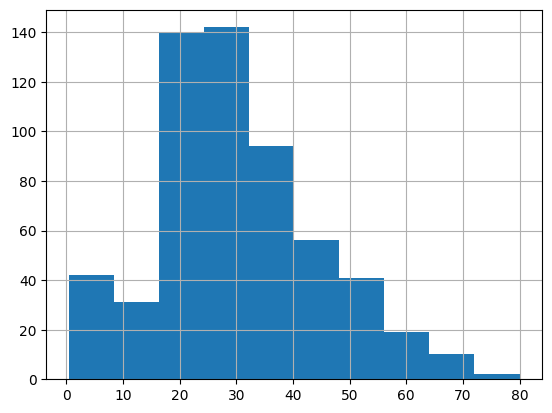

In [122]:
import matplotlib.pyplot as plt
titanic.loc[titanic.Sex == 'male', "Age"].hist(bins=10)

Text(0, 0.5, 'Количество человек')

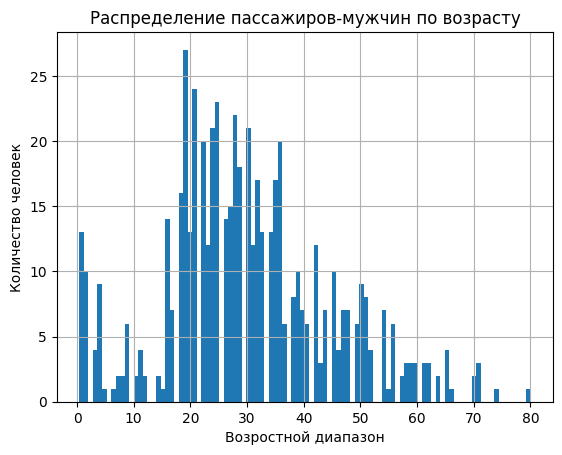

In [127]:
plt.hist(titanic[titanic.Sex =='male'].Age, bins=100)
plt.grid(True)
plt.title("Распределение пассажиров-мужчин по возрасту")
plt.xlabel("Возростной диапазон")
plt.ylabel("Количество человек")

# Работа с временными рядами
Индексная колонка датафрейма представлена датой и временем, что позволяет индексировать данные по дате и времени, ресемплировать (осуществлять выборку с большей или с меньшей частотой), интерполировать отсутствующие данные, применять оконные функции.

Допустим, у нас есть статистика перевозки пассажиров некой авиакомпании. Сгенерируем эти данные по месяцам:

In [135]:
# Сгенерируем диапазон дат с частотой 1 месяц
date_rng = pd.date_range(start="1949-01-01", end="1960-12-01", freq="MS")
# Создадим соответствующий датафрейм
df = pd.DataFrame(date_rng, columns=["date"])
df["passengers"] = np.random.randint(100,500, size=len(date_rng))

df.set_index('date', inplace=True)

df.head()


,passengers
date,
1949-01-01,352
1949-02-01,111
1949-03-01,182
1949-04-01,183
1949-05-01,386


In [137]:
df_downsampled = df.resample("A").mean()

C:\Users\NatalkaNerealka\AppData\Local\Temp\ipykernel_19892\4261394434.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_downsampled = df.resample("A").mean()


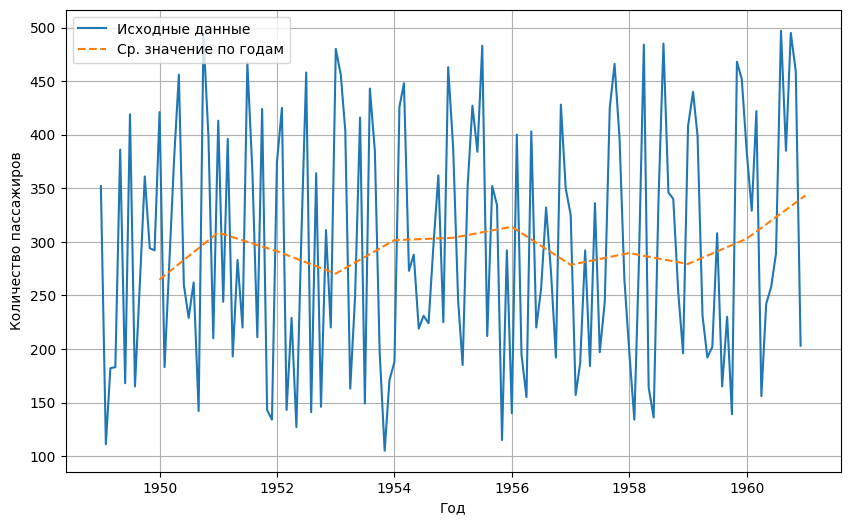

In [138]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df["passengers"], label="Исходные данные")
plt.plot(df_downsampled.index, df_downsampled["passengers"], label="Ср. значение по годам", linestyle='--')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.legend()
plt.show()

Применим скользящее окно и рассчитаем среднее количество пассажиров за последние 12 месяцев:

In [140]:
df_rolled = df.rolling(12).mean()
df_rolled.head(15)

,passengers
date,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


В первых 11 строках по умолчанию появились значения NaN, так как количество проанализированных строк меньше размера окна. Это поведение можно изменить, задав параметр min_periods — минимальное количество строк, для которых определён результат:

In [141]:
df.rolling(12, min_periods=1).mean().head()

,passengers
date,
1949-01-01,352.0
1949-02-01,231.5
1949-03-01,215.0
1949-04-01,207.0
1949-05-01,242.8


# Seaborn

In [142]:
!pip install seaborn notebook

  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached anyio-4.9.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jupyter_server_terminals-0.5.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached overrides-7.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached Send2Trash-1.8.3-py3-none-any.whl.metadata (4.0 kB)
  Using cached terminado-0.18.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jupyter_lsp-2.2.5-py3-none-any.whl.metadata (1.8 kB)
  Using cached babel-2.17.0-py3-none-any.whl.metadata (2.0 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3

Перед тем, как мы начнем строить графики, нам нужны данные. Прелесть seaborn в том, что он работает непосредственно с объектами dataframe из pandas, что делает ее очень удобной. Более того, библиотека поставляется с некоторыми встроенными наборами данных, которые можно использовать прямо из кода, и не загружать файлы вручную.

Давайте посмотрим, как это работает на наборе данных о рейсах самолетов.

In [143]:
import seaborn as sns


In [144]:
flights_data = sns.load_dataset("flights")
flights_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# Диаграмма рассеяния 
Диаграмма рассеяния — это диаграмма, которая отображает точки на основе двух измерений набора данных. Создать диаграмму рассеяния в seaborn очень просто, ведь для этого нужна всего одна строчка кода.

<Axes: xlabel='year', ylabel='passengers'>

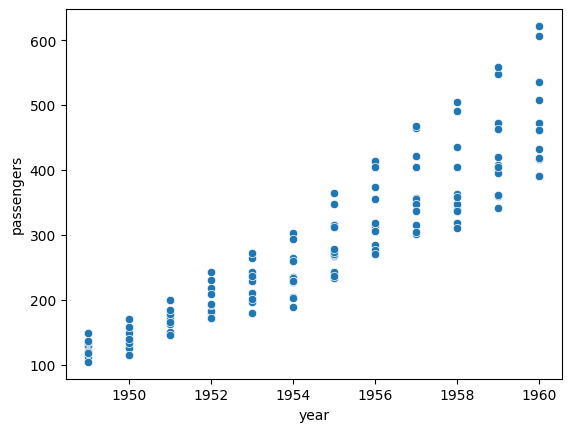

In [145]:
sns.scatterplot(data=flights_data, x="year", y="passengers")

Функция scatterplot принимает в себя набор данных, который нужно визуализировать, и столбцы, которые будут выступать как оси x и y.

# Линейный график — Line Plot

Этот график рисует линию, которая представляет собой развитие непрерывных или категориальных данных. Этот вид графиков популярен и известен, и его легко создать. Как и раньше, мы воспользуемся функцией lineplot с набором данных и столбцами, представляющими оси x и y. Остальное за нас сделает seaborn.

<Axes: xlabel='year', ylabel='passengers'>

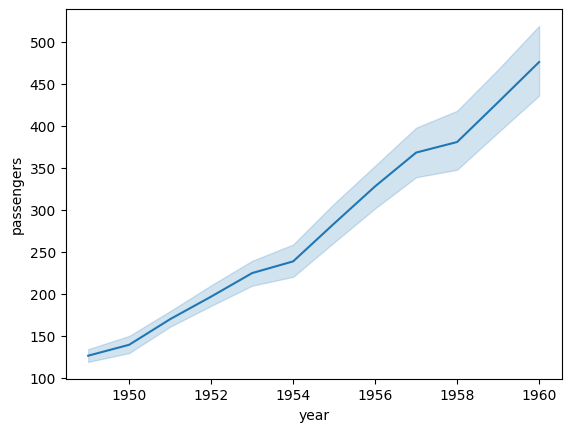

In [146]:
sns.lineplot(flights_data, x='year', y='passengers')

# Столбчатая диаграмма — Bar Plot
Наверное, это самый известный тип диаграммы, и, как вы уже догадались, мы можем построить этот тип диаграмм с помощью seaborn, также, как мы сделали это для линейного графика и диаграммы рассеяния, с помощью функции barplot.

<Axes: xlabel='year', ylabel='passengers'>

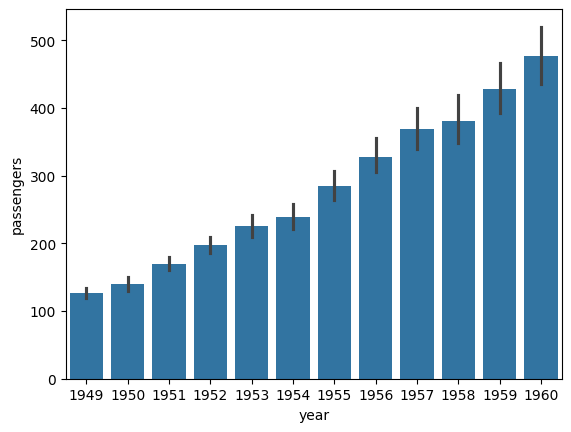

In [149]:
sns.barplot(data=flights_data, x="year", y="passengers")

# Расширение функционала с matplotlib
Seaborn основывается на matplotlib, расширяя ее функциональные возможности и абстрагируя сложность. При этом seaborn не теряет в своей мощности. Любая диаграмма seaborn может быть кастомизирована с помощью функций из библиотеки matplotlib. Эта механика может пригодиться в определенных случаях и позволяет seaborn использовать возможности matplotlib без необходимости переписывать все ее функции.

<Axes: xlabel='depth', ylabel='count'>

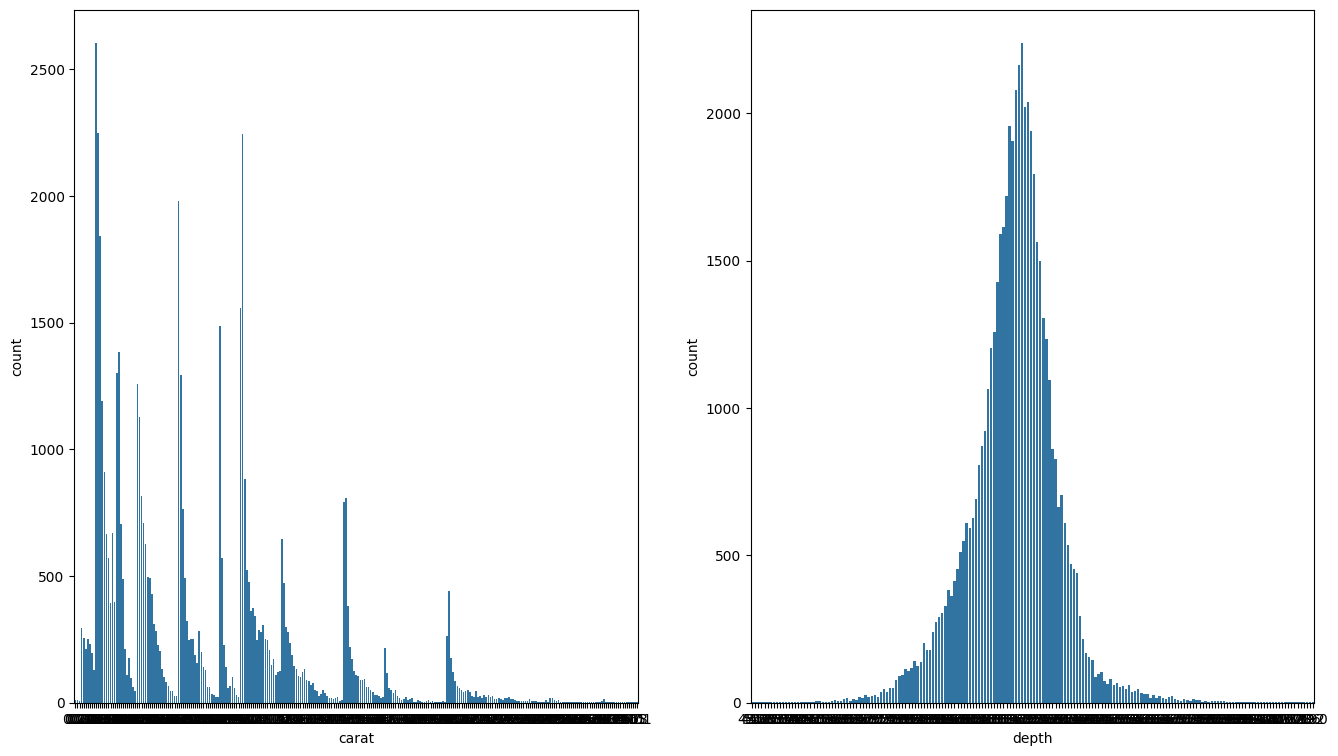

In [151]:
diamonds_data = sns.load_dataset('diamonds')
plt.figure(figsize=(16,9))
plt.subplot(1, 2, 1)
sns.countplot(x='carat', data=diamonds_data)
plt.subplot(1, 2, 2)
sns.countplot(x='depth', data=diamonds_data)

С помощью функции subplot на одном графике можно построить несколько диаграмм. Функция принимает в себя три параметра: первый – количество строк, второй – количество столбцов, третий – количество диаграмм.

Мы визуализируем по одной диаграмме seaborn на каждой части графика, смешивая функционал matplotlib и seaborn.

# Seaborn и Pandas
Мы уже говорили о том, что seaborn любит pandas до такой степени, что все ее функции строятся на структуре dataframe. До этого момента мы использовали seaborn с предварительно загруженными данными, но что, если мы хотим визуализировать данные, которые уже загрузили с помощью pandas?

In [152]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,male adult
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,female adult
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female adult
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,female adult
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,male adult


<Axes: xlabel='Pclass', ylabel='Age'>

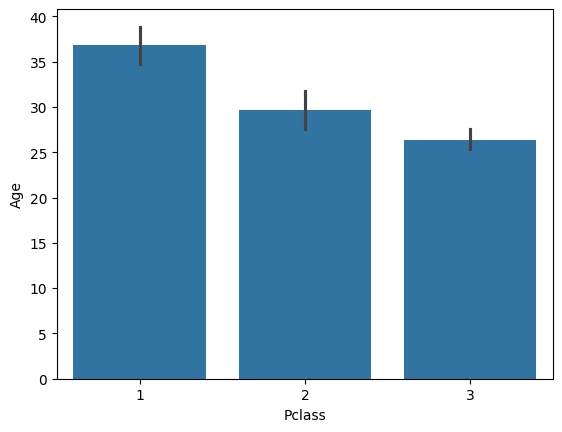

In [154]:
sns.barplot(x='Pclass', y='Age', data=titanic)

# Создание красивых графиков с помощью стилей

Seaborn дает возможность менять интерфейс ваших графиков. Для этого из коробки у нас в распоряжении есть пять стилей: darkgrid, whitegrid, dark, white и ticks.

<Axes: xlabel='year', ylabel='passengers'>

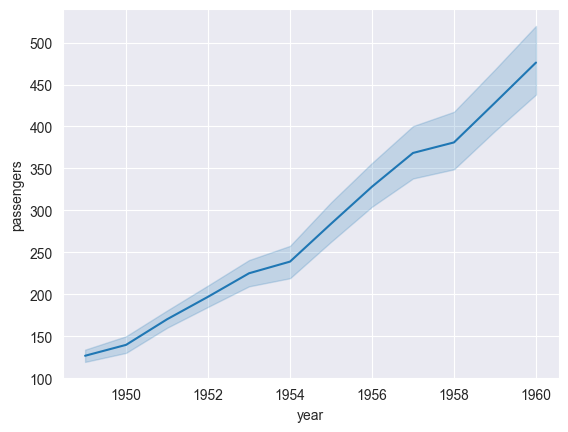

In [155]:
sns.set_style("darkgrid")
sns.lineplot(flights_data, x='year', y='passengers')

<Axes: xlabel='year', ylabel='passengers'>

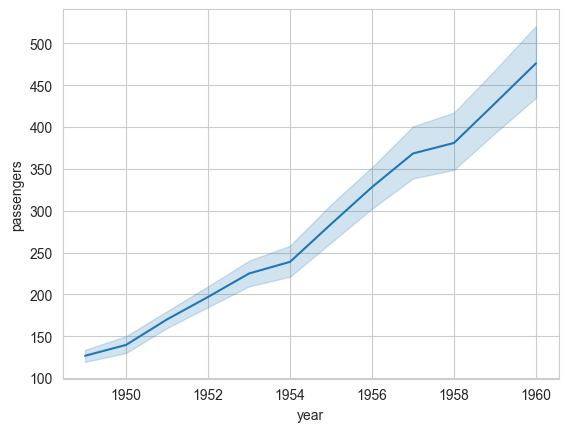

In [156]:
sns.set_style("whitegrid")
sns.lineplot(flights_data, x='year', y='passengers')

In [160]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [161]:
tips_df['tip_percentage'] = tips_df['tip'] / tips_df['total_bill']
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


<Axes: xlabel='tip_percentage', ylabel='Count'>

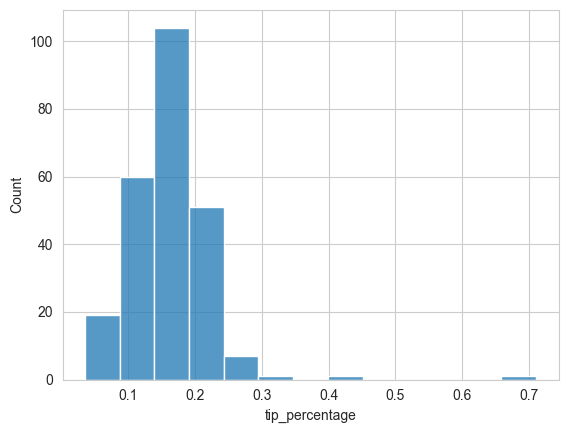

In [163]:
sns.histplot(tips_df['tip_percentage'], binwidth=0.05)

<Axes: xlabel='tip_percentage', ylabel='Count'>

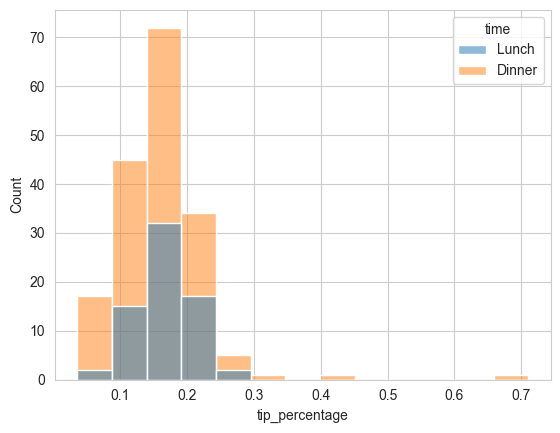

In [164]:
sns.histplot(data=tips_df, x='tip_percentage', binwidth=0.05, hue="time")

### Общее количество чаевых за определенный день недели
Еще одна интересная метрика — это количество чаевых, которые получает персонал в зависимости от дня недели.

<Axes: xlabel='day', ylabel='tip'>

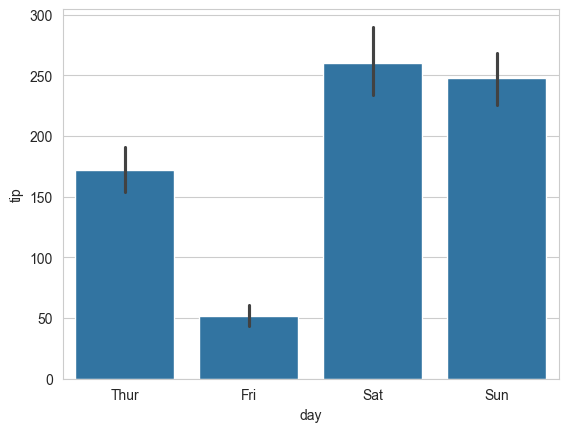

In [166]:
sns.barplot(data=tips_df, x='day', y='tip', estimator=np.sum)

C:\Users\NatalkaNerealka\AppData\Local\Temp\ipykernel_19892\1573486367.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = tips_df.pivot_table(


<Axes: xlabel='size', ylabel='day'>

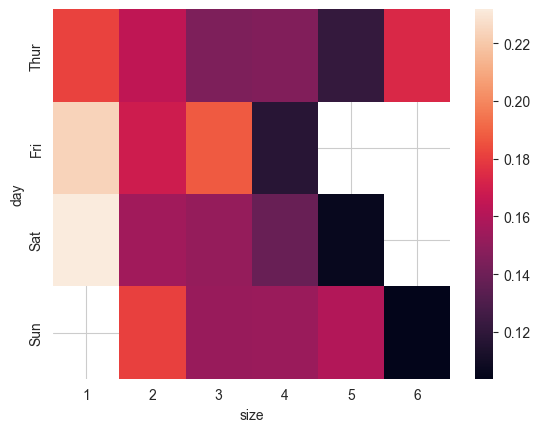

In [167]:
pivot = tips_df.pivot_table(
    index=['day'],
    columns=['size'],
    values = "tip_percentage",
    aggfunc=np.average
)

sns.heatmap(pivot)